# DISEÑO DE EXPERIMENTOS

Como vimos, le diseño de experimentos es una herramienta fundamental para la toma de decisiones y la optimización de procesos. 

Revisaremos los conceptos previamente vistos y los nuevos los abordaremos con ejemplos

## ANOVA DE UN FACTOR

Recordemos los elementos principales de la ANOVA de un Factor:

\begin{equation}
y_{ij} = \mu + \tau_{i} + \epsilon_{ij}
\end{equation}

con $i = 1, \dots, k$ y $j = 1, \dots, n$

y las fuentes de variación

\begin{equation}
\underbrace{\sum_{i=1}^{k} \sum_{j=1}^{n} \left( y_{ij} - \overline{y}_{\cdot\cdot} \right)^{2}}_{SS_{Total}} = \underbrace{n \sum_{i=1}^{k} \left( \overline{y}_{i\cdot} - \overline{y}_{\cdot\cdot} \right)^{2}}_{SS_{Tratamientos}} + \underbrace{\sum_{i=1}^{k} \sum_{j=1}^{n} \left( y_{ij} - \overline{y}_{i\cdot} \right)^{2} }_{SS_{Error}}
\end{equation}

con la media global definida como $y_{\cdot\cdot} = \frac{1}{N} \sum_{i=1}^{k} \sum_{j=1}^{n} y_{ij}$ y $N = nk$

Dado lo anterior se tiene:

\begin{equation}
E \left( \frac{SS_{Tratamientos}}{k-1} \right) = \sigma^{2} + \frac{n \sum_{i=1}^{k} \tau_{i}^{2}}{k-1}
\end{equation}

y

\begin{equation}
E \left( \frac{SS_{Error}}{N-k} \right) = \sigma^{2}
\end{equation}

El constraste se realiza usando la distribución $F-Snedecor$ con lo que el estadístico de pruebe es:

\begin{equation}
F_{0} = \frac{SS_{Tratamientos}/k-1}{SS_{Error}/N-k} \; \text{que se compara con} \; F_{\alpha,k-1,N-k}
\end{equation}

### Ejemplo

Un ingeniero de desarrollo de productos está interesado en maximizar la  resistencia a la tensión de una nueva fibra sintética que se empleará en la manufactura  de tela para camisas de hombre. El ingeniero sabe por experiencia  que la resistencia está influida por el porcentaje de algodón presente en la fibra.
Además, sospecha que el contenido de algodón debe estar aproximadamente entre  un 10 y un 40% para que la tela resultante tenga otras caracteristicas de calidad que se desean (como la capacidad de recibir un tratamiento de planchado  permanente). El ingeniero decide probar muestras a cinco niveles de porcentaje de algodón: 15, 20, 25, 30 y 35%. Asimismo, decide ensayar cinco muestras a cada nivel de contenido de algodón. Las 25 observaciones deben asignarse al azar. Las observaciones obtenidas son:

| % Algodón | Rep1 | Rep2 | Rep3 | Rep4 | Rep5 |
|-----------|------|------|------|------|------|
| 15        | 7    | 7    | 15   | 11   | 9    |
| 20        | 12   | 17   | 12   | 18   | 18   |
| 25        | 14   | 18   | 18   | 19   | 19   |
| 30        | 19   | 25   | 22   | 19   | 23   |
| 35        | 7    | 10   | 11   | 15   | 11   |

Veamos cómo lo resolvemos

In [ ]:
# Leemos los datos (se encuentran en un archivo txt)
data<-read.table(url("https://www.dropbox.com/s/gh9a6uch1xx92hn/algodon.txt?dl=1"), header=TRUE)
head(data)

,algodon,value
,<fct>,<int>
1,15%,7
2,15%,7
3,15%,15
4,15%,11
5,15%,9
6,20%,12


In [ ]:
data

algodon,value
<fct>,<int>
15%,7
15%,7
15%,15
15%,11
15%,9
20%,12
20%,17
20%,12
20%,18


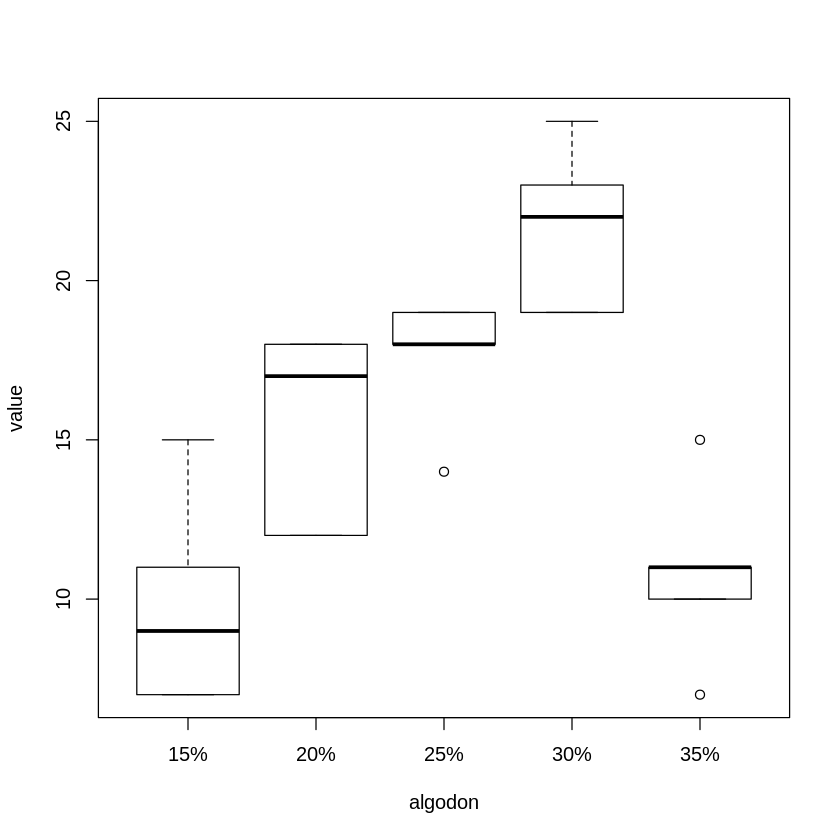

In [ ]:
# Grafiquemos
plot(data)

In [ ]:
# Separemos los datos:
attach(data)

In [ ]:
# Realicemos la ANOVA
anova(lm(value~algodon))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
algodon,4,475.76,118.94,14.75682,9.127937e-06
Residuals,20,161.20,8.06,NA,NA


In [ ]:
# Otra forma de verla
summary(aov(value~algodon))

            Df Sum Sq Mean Sq F value   Pr(>F)    
algodon      4  475.8  118.94   14.76 9.13e-06 ***
Residuals   20  161.2    8.06                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
# Detectemos dónde están las diferencias:
summary(lm(value~algodon))
detach(data) #Volvemos a unir los datos


Call:
lm(formula = value ~ algodon)

Residuals:
   Min     1Q Median     3Q    Max 
  -3.8   -2.6    0.4    1.4    5.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    9.800      1.270   7.719 2.02e-07 ***
algodon20%     5.600      1.796   3.119 0.005409 ** 
algodon25%     7.800      1.796   4.344 0.000315 ***
algodon30%    11.800      1.796   6.572 2.11e-06 ***
algodon35%     1.000      1.796   0.557 0.583753    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.839 on 20 degrees of freedom
Multiple R-squared:  0.7469,	Adjusted R-squared:  0.6963 
F-statistic: 14.76 on 4 and 20 DF,  p-value: 9.128e-06


In [ ]:
summary(lm(value~algodon-1, data = data))


Call:
lm(formula = value ~ algodon - 1, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
  -3.8   -2.6    0.4    1.4    5.2 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
algodon15%     9.80       1.27   7.719 2.02e-07 ***
algodon20%    15.40       1.27  12.129 1.12e-10 ***
algodon25%    17.60       1.27  13.862 1.02e-11 ***
algodon30%    21.60       1.27  17.013 2.31e-13 ***
algodon35%    10.80       1.27   8.506 4.46e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.839 on 20 degrees of freedom
Multiple R-squared:  0.9744,	Adjusted R-squared:  0.968 
F-statistic: 152.1 on 5 and 20 DF,  p-value: 3.336e-15


In [ ]:
summary(aov(lm(value~algodon-1, data = data)))

          Df Sum Sq Mean Sq F value   Pr(>F)    
algodon    5   6131  1226.2   152.1 3.34e-15 ***
Residuals 20    161     8.1                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### Otro ejemplo

A un agricultor le ofrecen cuatro tipos de fertilizante para sus cultivos de patatas. Para compararlos utiliza cada uno de ellos en diez parcelas de su terreno y anota los kilos recolectados al final de la temporada. Los datos son:

| Kg | Fertilizante | Kg | Fertilizante | Kg | Fertilizante | Kg | Fertilizante |
|----|--------------|----|--------------|----|--------------|----|--------------|
| 47 | 1            | 51 | 2            | 37 | 3            | 42 | 4            |
| 42 | 1            | 56 | 2            | 39 | 3            | 43 | 4            |
| 43 | 1            | 54 | 2            | 41 | 3            | 42 | 4            |
| 46 | 1            | 49 | 2            | 38 | 3            | 45 | 4            |
| 44 | 1            | 53 | 2            | 39 | 3            | 47 | 4            |
| 42 | 1            | 51 | 2            | 37 | 3            | 50 | 4            |
| 45 | 1            | 50 | 2            | 42 | 3            | 48 | 4            |
| 43 | 1            | 49 | 2            | 36 | 3            | 45 | 4            |
| 44 | 1            | 50 | 2            | 40 | 3            | 44 | 4            |
| 44 | 1            | 53 | 2            | 40 | 3            | 45 | 4            |

* ¿Son igual de efectivos los cuatro fertilizantes?
* Estudiar las hipótesis del modelo: homogeneidad de las varianzas por grupos, normalidad y gráfica de residuos.
* Realizar las comparaciones múltiples mediante los métodos posibles


In [ ]:
# Leemos los datos
data<-read.table(url("https://www.dropbox.com/s/tcrb6g71e1n442y/fertilizante.txt?dl=1"),header=T,dec=",",sep="\t")
head(data)

,Produccion,Fertilizante
,<int>,<int>
1,47,1
2,42,1
3,43,1
4,46,1
5,44,1
6,42,1


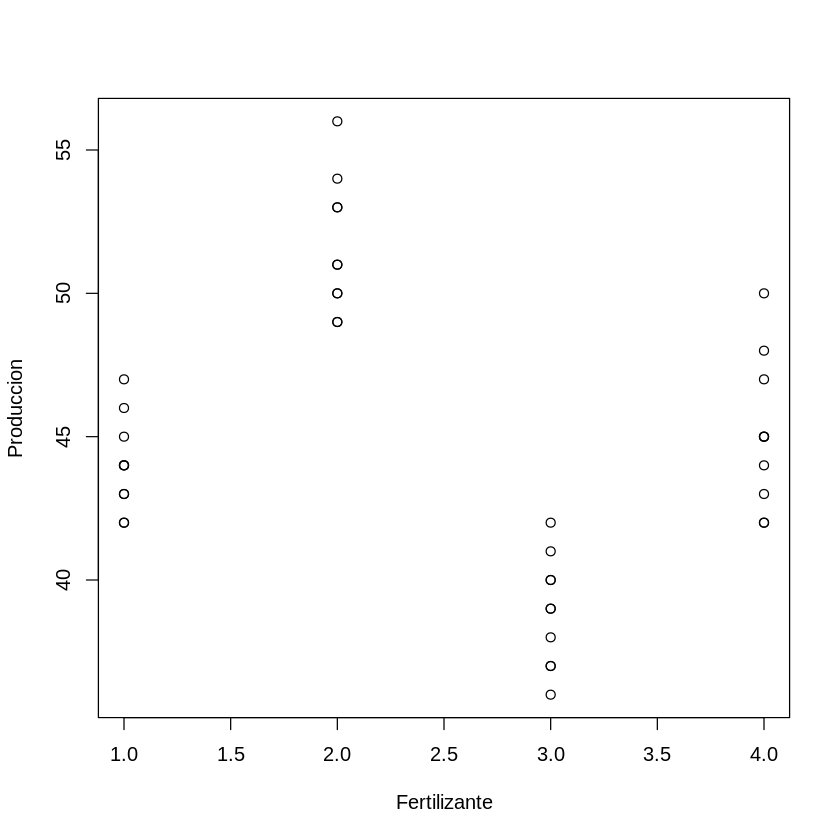

In [ ]:
# La gráfica
with(data, plot(Fertilizante,Produccion))

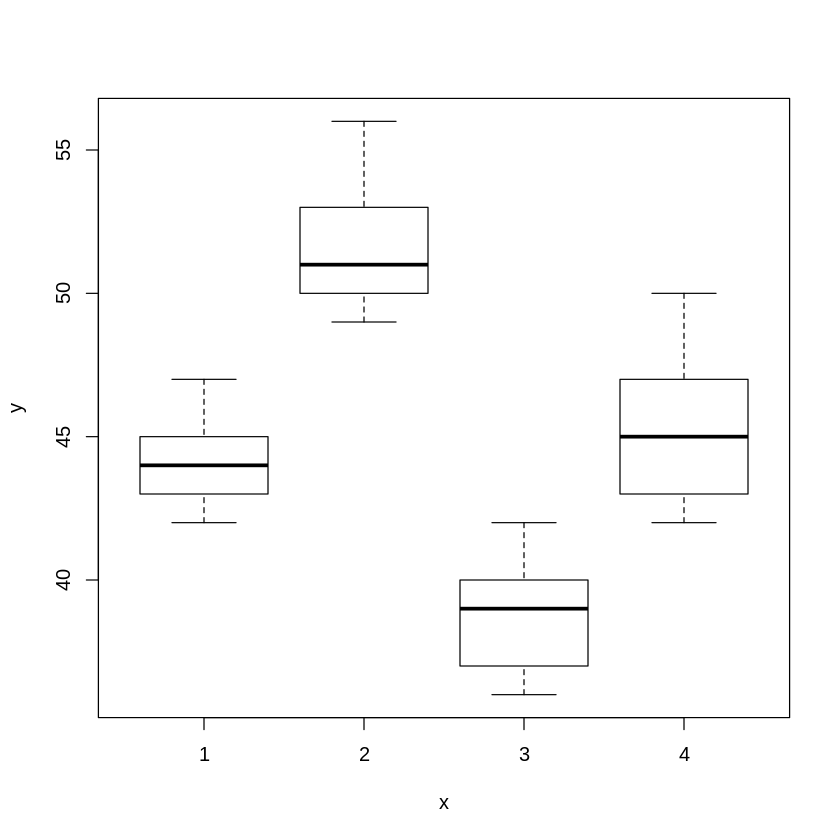

In [ ]:
# Convertimos en Factor la variable y volvemos a graficar
data$Fertilizante<-factor(data$Fertilizante)
with(data, plot(Fertilizante,Produccion))

In [ ]:
# Vamos a hacerlo creando los objetos tipo modelo
m.aov<-lm(Produccion~Fertilizante,data=data)
summary(m.aov)


Call:
lm(formula = Produccion ~ Fertilizante, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-3.100 -1.675 -0.100  1.400  4.900 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    44.0000     0.6795  64.757  < 2e-16 ***
Fertilizante2   7.6000     0.9609   7.909 2.19e-09 ***
Fertilizante3  -5.1000     0.9609  -5.308 5.85e-06 ***
Fertilizante4   1.1000     0.9609   1.145     0.26    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.149 on 36 degrees of freedom
Multiple R-squared:  0.831,	Adjusted R-squared:  0.8169 
F-statistic: 59.02 on 3 and 36 DF,  p-value: 5.646e-14


In [ ]:
# La ANOVA en detalle
aov.m<-aov(m.aov)
summary(aov.m)

             Df Sum Sq Mean Sq F value   Pr(>F)    
Fertilizante  3  817.4  272.47   59.02 5.65e-14 ***
Residuals    36  166.2    4.62                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
# Test de comparación de medias:
attach(data)
library(stats)
pairwise.t.test(Produccion,Fertilizante)

The following objects are masked from data (pos = 3):

    Fertilizante, Produccion





	Pairwise comparisons using t tests with pooled SD 

data:  Produccion and Fertilizante 

  1       2       3      
2 1.1e-08 -       -      
3 1.2e-05 1.3e-14 -      
4 0.26    2.7e-07 5.2e-07

P value adjustment method: holm 

In [ ]:
# El test de Tukey que nos permite revisar si, efectivamente, se observan diferencias entre niveles
tk.aov.m<-TukeyHSD(aov.m)
tk.aov.m

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = m.aov)

$Fertilizante
     diff        lwr        upr     p adj
2-1   7.6   5.012072  10.187928 0.0000000
3-1  -5.1  -7.687928  -2.512072 0.0000337
4-1   1.1  -1.487928   3.687928 0.6647241
3-2 -12.7 -15.287928 -10.112072 0.0000000
4-2  -6.5  -9.087928  -3.912072 0.0000004
4-3   6.2   3.612072   8.787928 0.0000010


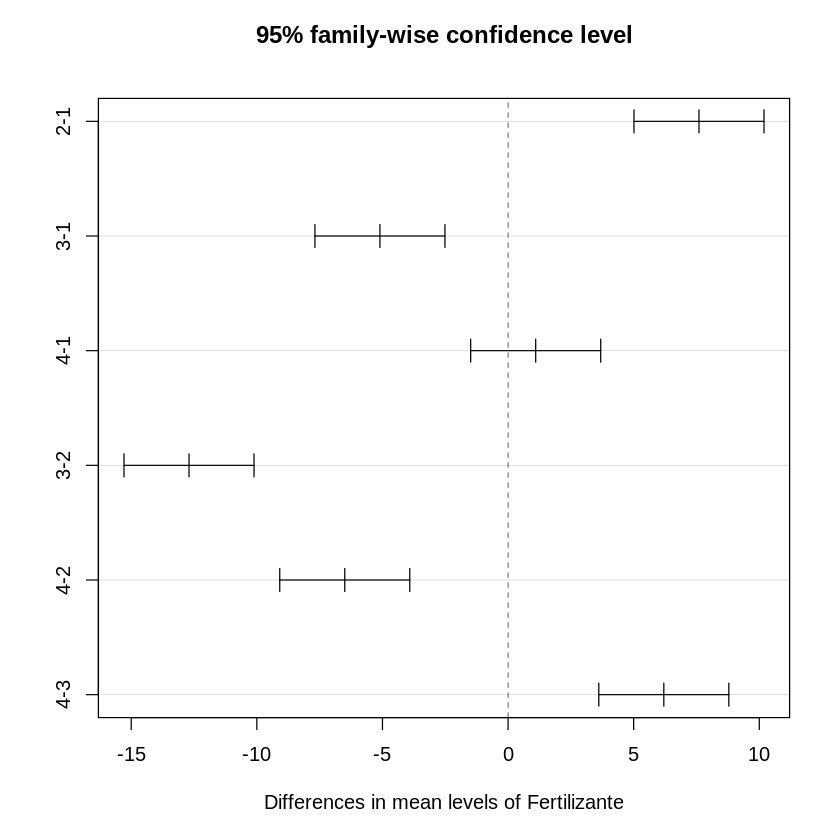

In [ ]:
# Y el gráfico
plot(tk.aov.m)

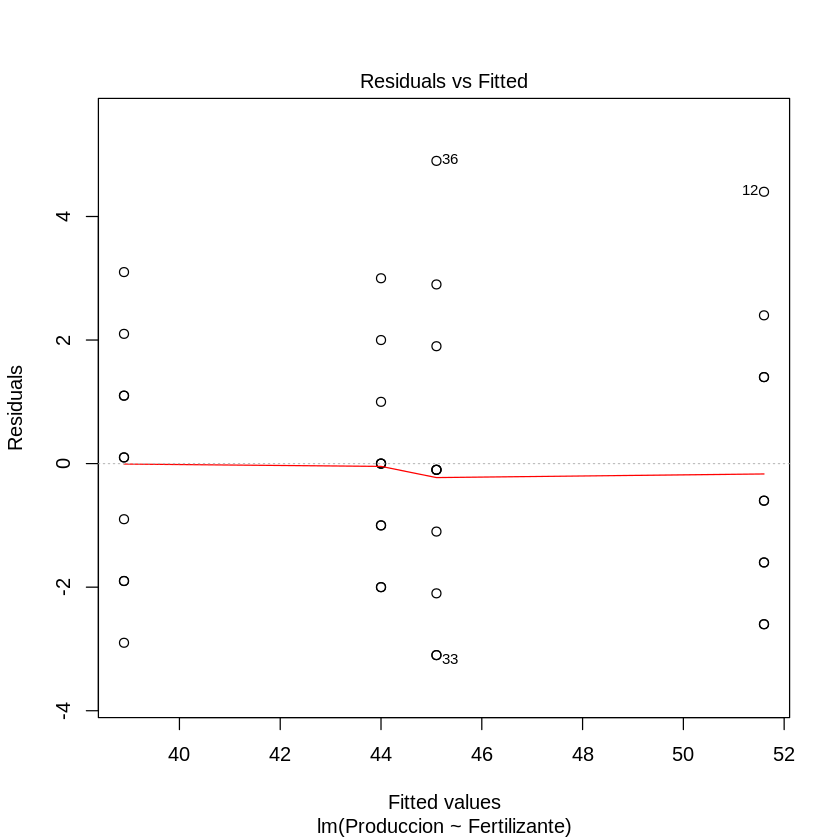

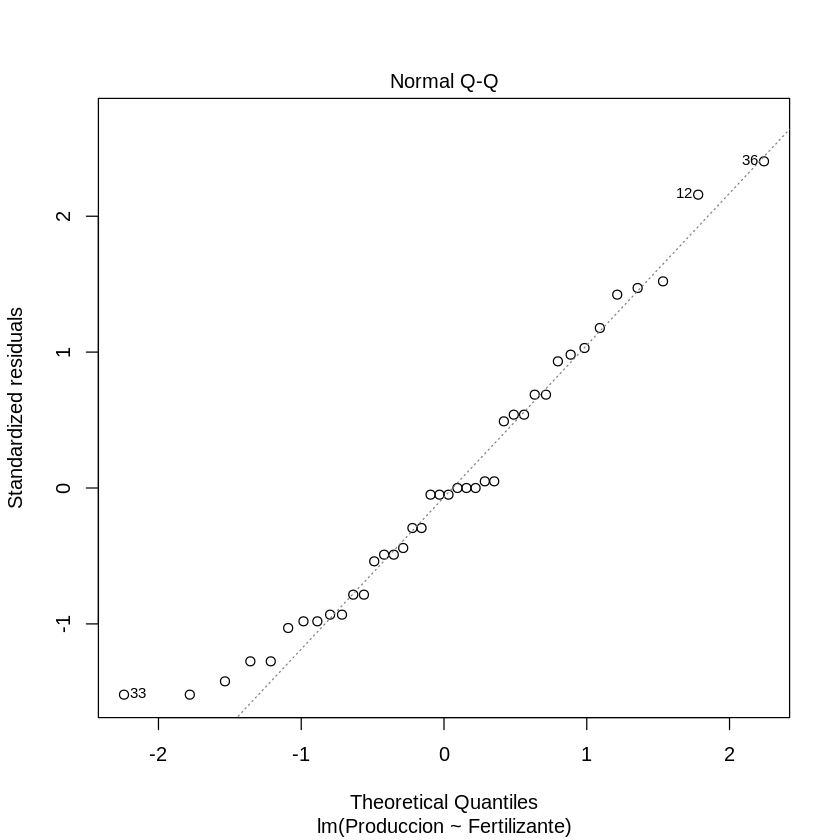

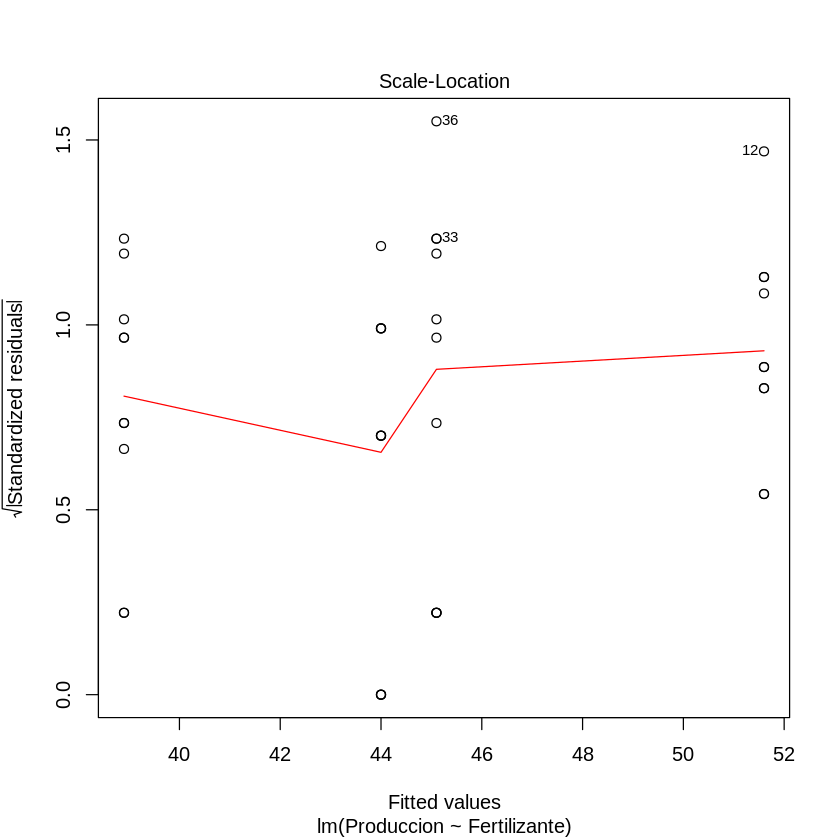

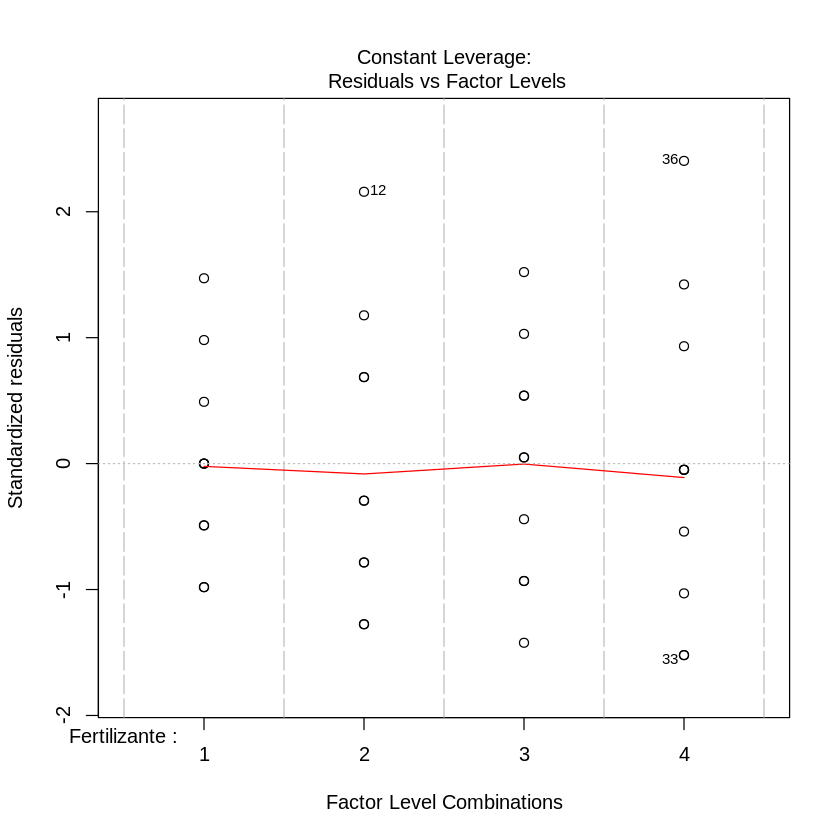

In [ ]:
plot(m.aov)

## Diseño por Bloques

Se plantea contrastar la igualdad de medias de tratamientos:

\begin{eqnarray*}
H_{0} &:& \tau_{1} = \tau_{2} = \dots = \tau_{k} = 0\\
H_{1} &:& \tau_{i} \neq 0 \text{ al menos para un } i
\end{eqnarray*}

Se emplea:
{\small
\begin{eqnarray}
\sum_{i=1}^{k} \sum_{j=1}^{b} \left( y_{ij} - \overline{y}_{\cdot\cdot} \right)^{2} &=& b \sum_{i=1}^{k} \left( \overline{y}_{i \cdot} - \overline{y}_{\cdot\cdot} \right)^{2} + k \sum_{j=1}^{b} \left( \overline{y}_{\cdot j} - \overline{y}_{\cdot\cdot}  \right)^{2}\\
 & &   + \sum_{i=1}^{k} \sum_{j=1}^{b} \left( y_{ij} - \overline{y}_{\cdot j} - \overline{y}
_{i \cdot} + \overline{y}_{\cdot\cdot} \right)^{2}\nonumber
\end{eqnarray}}

Con lo cual se tiene:

\begin{equation}
SS_{TOTAL} = SS_{TRATAMIENTOS} + SS_{BLOQUES} + SS_{ERROR}
\end{equation}

De lo anterior se obtiene:

\begin{eqnarray}
E \left[ MS_{TRATAMIENTOS} \right] & = & \sigma^{2} + \frac{b \sum_{i=1}^{k} \tau_{i}^{2}}{k-1} \\
E \left[ MS_{BLOQUES} \right] & = & \sigma^{2} + \frac{k \sum_{j=1}^{b} \beta_{i}^{2}}{b-1} \\
E \left[ MS_{ERROR} \right] & = & \sigma^{2}
\end{eqnarray}

La idoneidad del modelo se contrasta:

\begin{equation}
F_{0} = \frac{MS_{TRATAMIENTOS}}{MS_{ERROR}}
\end{equation}

Que sigue una distribución $F_{\alpha,k-1, kb-k-b+1}$.

Para el caso de los Bloques

\begin{eqnarray*}
H_{0} &:& \beta_{1} = \beta_{2} = \dots = \beta_{b} = 0\\
H_{1} &:& \beta_{j} \neq 0 \text{ al menos para un } j
\end{eqnarray*}

Bajo el mismo principio de los \textit{Tratamientos} se obtiene:

\begin{equation}
F_{0} = \frac{MS_{BLOQUES}}{MS_{ERROR}}
\end{equation}

Que sigue una distribución $F_{\alpha,b-1, kb-k-b+1}$.

### Ejemplo:

Para comprobar el desgaste de cuatro tipos de neumáticos T1 a T4 (variable factor A) se seleccionan tres coches (variable bloque B) colocando en orden aleatorio los cuatro tipos de neumáticos en cada coche. Al cabo de 10,000 km se mide el desgaste de los neumáticos en cada coche con los resultados siguientes (los valores se han redondeado y expresado en unidades convenientes para simplificar los cálculos). Qué podemos deducir del experimento?

| T\B | C1 | C2 | C3 |
|-----|----|----|----|
| T1  | 18 | 9  | 15 |
| T2  | 23 | 19 | 12 |
| T3  | 22 | 21 | 20 |
| T4  | 33 | 27 | 21 |

In [ ]:
# Cargamos los datos
tabla<-read.table(url("https://www.dropbox.com/s/k85gbg2diq9i5gk/coches.txt?dl=1"),header = T,dec = ",", sep = "\t")
head(tabla)

,FACTOR,BLOQUE,DESGASTE
,<fct>,<fct>,<int>
1,T1,C1,18
2,T2,C1,23
3,T3,C1,22
4,T4,C1,33
5,T1,C2,9
6,T2,C2,19


In [ ]:
# Hagamos la prueba
test<-aov(DESGASTE~FACTOR+BLOQUE,data=tabla)
summary(test)

            Df Sum Sq Mean Sq F value Pr(>F)  
FACTOR       3    270   90.00   7.297 0.0199 *
BLOQUE       2    104   52.00   4.216 0.0719 .
Residuals    6     74   12.33                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
# El modelo
summary(lm(DESGASTE~FACTOR+BLOQUE,data=tabla))


Call:
lm(formula = DESGASTE ~ FACTOR + BLOQUE, data = tabla)

Residuals:
   Min     1Q Median     3Q    Max 
    -4     -3      1      2      4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   18.000      2.483   7.248  0.00035 ***
FACTORT2       4.000      2.867   1.395  0.21248    
FACTORT3       7.000      2.867   2.441  0.05039 .  
FACTORT4      13.000      2.867   4.534  0.00396 ** 
BLOQUEC2      -5.000      2.483  -2.013  0.09072 .  
BLOQUEC3      -7.000      2.483  -2.819  0.03040 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.512 on 6 degrees of freedom
Multiple R-squared:  0.8348,	Adjusted R-squared:  0.6972 
F-statistic: 6.065 on 5 and 6 DF,  p-value: 0.02427


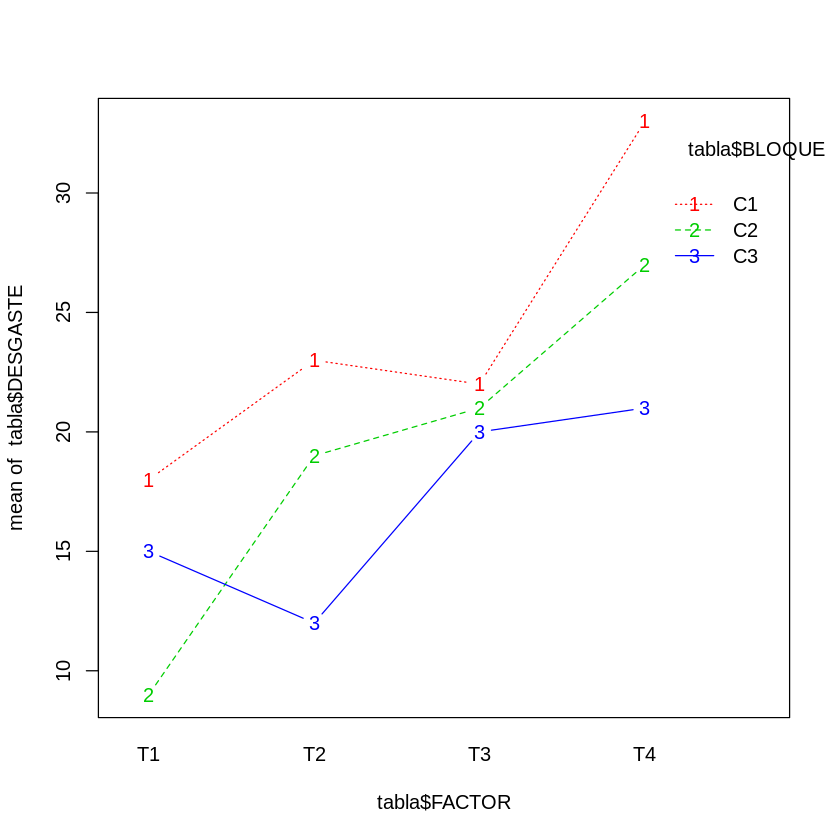

In [ ]:
# Hay algo que debemos procurar mirar, la interacción
interaction.plot(tabla$FACTOR,tabla$BLOQUE,tabla$DESGASTE,type="b",col=c(2:4))

In [ ]:
summary(lm(DESGASTE~FACTOR:BLOQUE,data=tabla))


Call:
lm(formula = DESGASTE ~ FACTOR:BLOQUE, data = tabla)

Residuals:
ALL 12 residuals are 0: no residual degrees of freedom!

Coefficients: (1 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)        2.100e+01         NA      NA       NA
FACTORT1:BLOQUEC1 -3.000e+00         NA      NA       NA
FACTORT2:BLOQUEC1  2.000e+00         NA      NA       NA
FACTORT3:BLOQUEC1  1.000e+00         NA      NA       NA
FACTORT4:BLOQUEC1  1.200e+01         NA      NA       NA
FACTORT1:BLOQUEC2 -1.200e+01         NA      NA       NA
FACTORT2:BLOQUEC2 -2.000e+00         NA      NA       NA
FACTORT3:BLOQUEC2 -2.676e-15         NA      NA       NA
FACTORT4:BLOQUEC2  6.000e+00         NA      NA       NA
FACTORT1:BLOQUEC3 -6.000e+00         NA      NA       NA
FACTORT2:BLOQUEC3 -9.000e+00         NA      NA       NA
FACTORT3:BLOQUEC3 -1.000e+00         NA      NA       NA
FACTORT4:BLOQUEC3         NA         NA      NA       NA

Residual standard

# Diseño de Cuadrados Latinos

Un cuadrado latino es una matriz de $n \times n$ elementos en la que cada casilla está ocupada por uno de los n símbolos de tal modo que cada uno de ellos aparece exactamente una vez en cada columna y en cada fila. La formulación es muy parecida a las anteriormente vistas

Un ejemplo lo explica mejor:

Supongamos que un experimentador está estudiando el efecto de cinco fórmulas diferentes de la mezcla de dinamita sobre la fuerza explosiva observada. Cada fórmula se prepara usando un lote de materia prima, lo suficientemente grande para que sólo se hagan cinco mezclas. Mas aún, las mezclas las preparan cinco operarios, pudiendo existir una diferencia sustancial en la habilidad y experiencia entre ellos. El diseño apropiado para este problema consiste en probar cada fórmula exactamente una vez, utilizando cada lote de materia prima, y en que cada fórmula sea preparada exactamente una vez por cada uno de los cinco operarios.

El diseño resultante es un cuadrado latino. Las cinco fórmulas se representan mediante las letras latinas A, B, C, D y E. Los datos aparecen a continuación:

| MATERIAL | 1  | 2  | 3  | 4  | 5  |
|----------|----|----|----|----|----|
| 1        | A  | B  | C  | D  | E  |
| _        | 24 | 20 | 19 | 24 | 24 |
| 2        | B  | C  | D  | E  | A  |
| _        | 17 | 24 | 30 | 27 | 36 |
| 3        | C  | D  | E  | A  | B  |
| _        | 18 | 38 | 26 | 27 | 21 |
| 4        | D  | E  | A  | B  | C  |
| _        | 26 | 31 | 26 | 23 | 22 |
| 5        | E  | A  | B  | C  | D  |
| _        | 22 | 30 | 20 | 29 | 31 |

Para simplificar los datos se resta 25 unidades y se obtiene:

| MATERIAL | 1  | 2  | 3  | 4  | 5  |
|----------|----|----|----|----|----|
| 1        | A  | B  | C  | D  | E  |
| _        | -1 | -5 | -6 | -1 | -1 |
| 2        | B  | C  | D  | E  | A  |
| _        | -8 | -1 | 5  | 2  | 11 |
| 3        | C  | D  | E  | A  | B  |
| _        | -7 | 13 | 1  | 2  | -4 |
| 4        | D  | E  | A  | B  | C  |
| _        | 1  | 6  | 1  | -2 | -3 |
| 5        | E  | A  | B  | C  | D  |
| _        | -3 | 5  | -5 | 4  | 6  |

In [ ]:
# Leemos los datos:
read.table(url("https://www.dropbox.com/s/q9j9wvanh9d2x6t/latinos.txt?dl=1"))->latinos
head(latinos)

,Formula,Material,Operario,respuesta
,<fct>,<int>,<int>,<int>
1,A,1,1,-1
2,B,1,2,-5
3,C,1,3,-6
4,D,1,4,-1
5,E,1,5,-1
6,B,2,1,-8


In [ ]:
# Convirtamos en factor los número de Material y Operario
attach(latinos)
Material<-as.factor(Material)
Operario<-as.factor(Operario)
is.factor(Formula)

[1] TRUE

In [ ]:
# El modelo
model1<-aov(respuesta~Material+Operario+Formula)
summary(model1)

            Df Sum Sq Mean Sq F value  Pr(>F)   
Material     4     68   17.00   1.594 0.23906   
Operario     4    150   37.50   3.516 0.04037 * 
Formula      4    330   82.50   7.734 0.00254 **
Residuals   12    128   10.67                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
# Las tablas de medias
model.tables(model1, "mean")

Tables of means
Grand mean
    
0.4 

 Material 
Material
   1    2    3    4    5 
-2.8  1.8  1.0  0.6  1.4 

 Operario 
Operario
   1    2    3    4    5 
-3.6  3.6 -0.8  1.0  1.8 

 Formula 
Formula
   A    B    C    D    E 
 3.6 -4.8 -2.6  4.8  1.0 

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = respuesta ~ Material + Operario + Formula)

$Material
    diff       lwr       upr     p adj
2-1  4.6 -1.983932 11.183932 0.2341812
3-1  3.8 -2.783932 10.383932 0.3966727
4-1  3.4 -3.183932  9.983932 0.4985311
5-1  4.2 -2.383932 10.783932 0.3079352
3-2 -0.8 -7.383932  5.783932 0.9945757
4-2 -1.2 -7.783932  5.383932 0.9754380
5-2 -0.4 -6.983932  6.183932 0.9996368
4-3 -0.4 -6.983932  6.183932 0.9996368
5-3  0.4 -6.183932  6.983932 0.9996368
5-4  0.8 -5.783932  7.383932 0.9945757

$Operario
    diff         lwr       upr     p adj
2-1  7.2   0.6160683 13.783932 0.0300318
3-1  2.8  -3.7839317  9.383932 0.6646176
4-1  4.6  -1.9839317 11.183932 0.2341812
5-1  5.4  -1.1839317 11.983932 0.1292447
3-2 -4.4 -10.9839317  2.183932 0.2691629
4-2 -2.6  -9.1839317  3.983932 0.7194121
5-2 -1.8  -8.3839317  4.783932 0.9019734
4-3  1.8  -4.7839317  8.383932 0.9019734
5-3  2.6  -3.9839317  9.183932 0.7194121
5

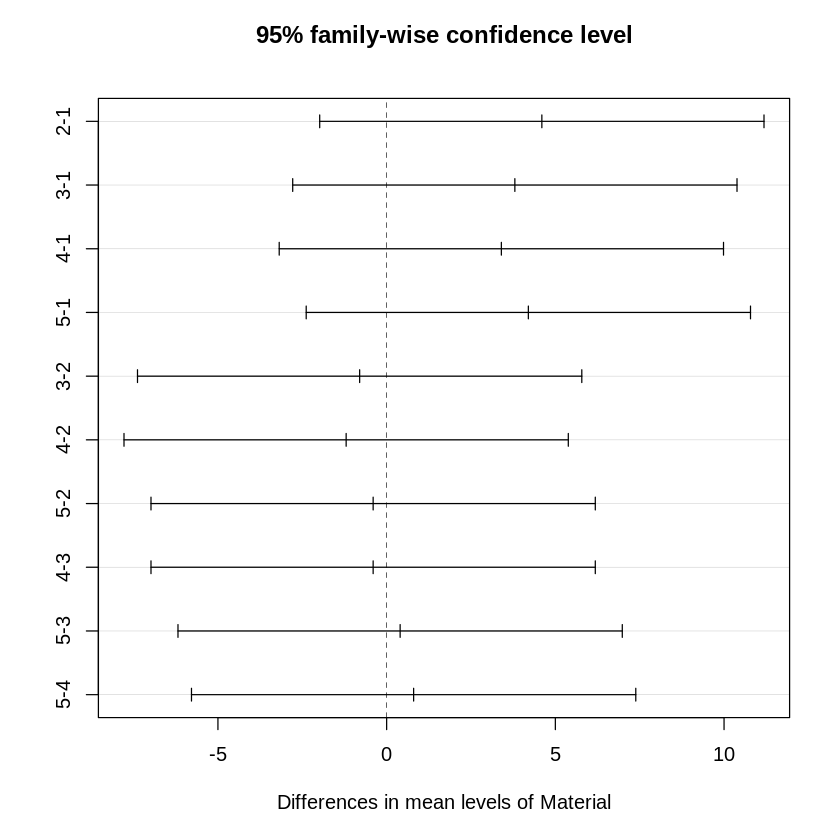

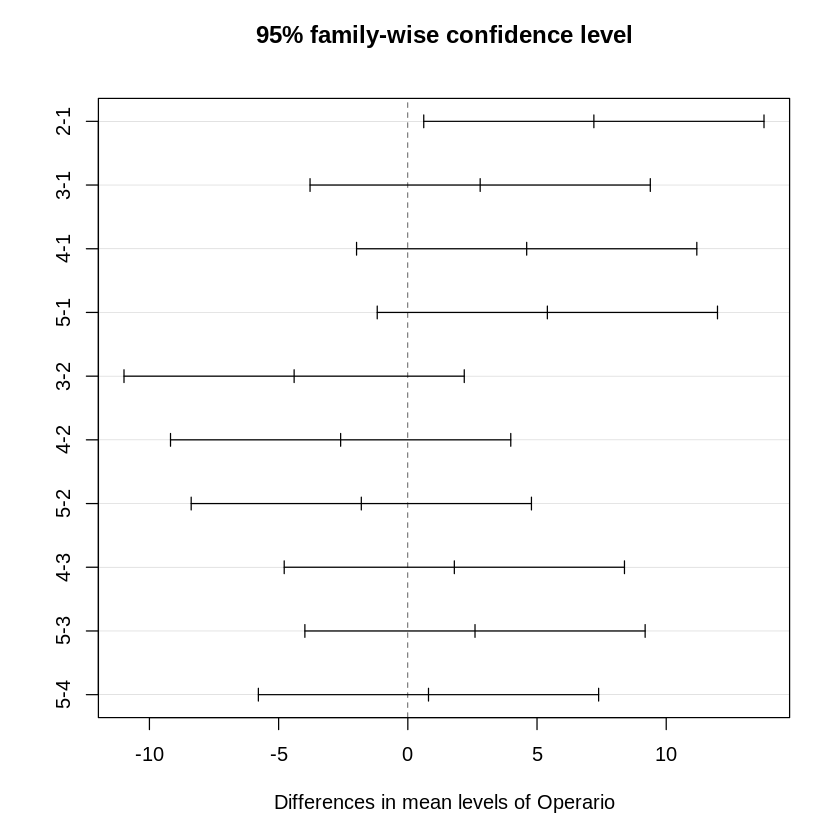

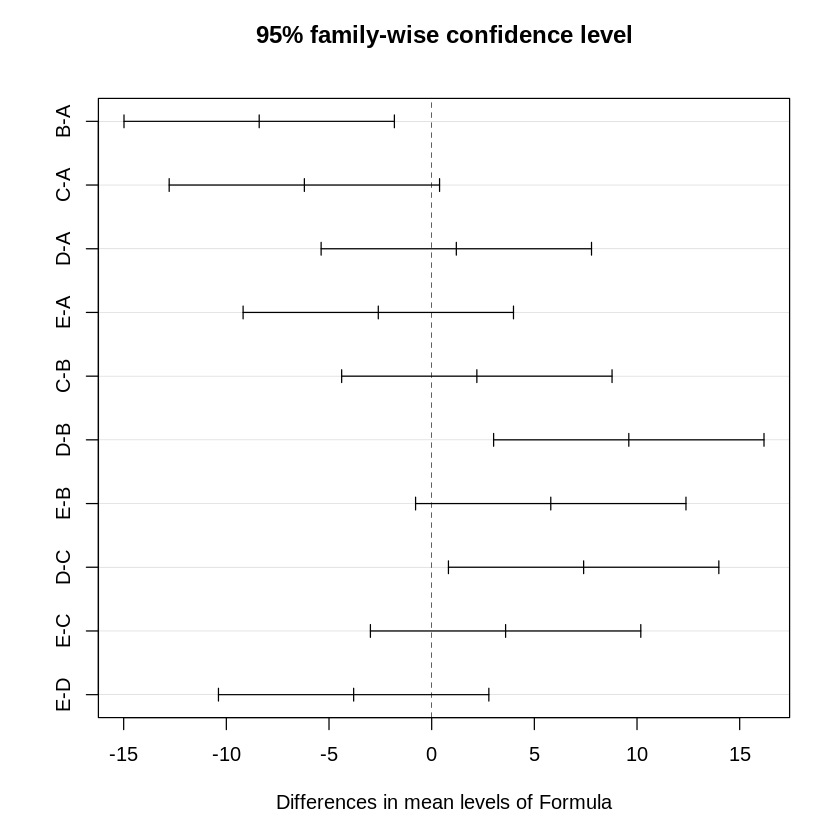

In [ ]:
# La prueba de Tukey
TukeyHSD(model1)
plot(TukeyHSD(model1))

**Ejercicio**

Plantee un ejercicio, a su gusto, donde sea posible hacer uso de los distintos tipos de Diseño de Experimentos:


*   ANOVA de un Factor (Efectos Fijos)
*   Anova de un Factor (Efectos Aleatorios)
*   Diseño por Bloques
*   Diseño Factorial (Dos Factores)
*   Cuadrado Latino

